In [180]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, accuracy_score

In [181]:
# Load the dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Display the first few rows
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Data Preprocessing / Exploratory Data Analysis (EDA)

In [182]:
# Display basic information about the dataset
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


In [183]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [184]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

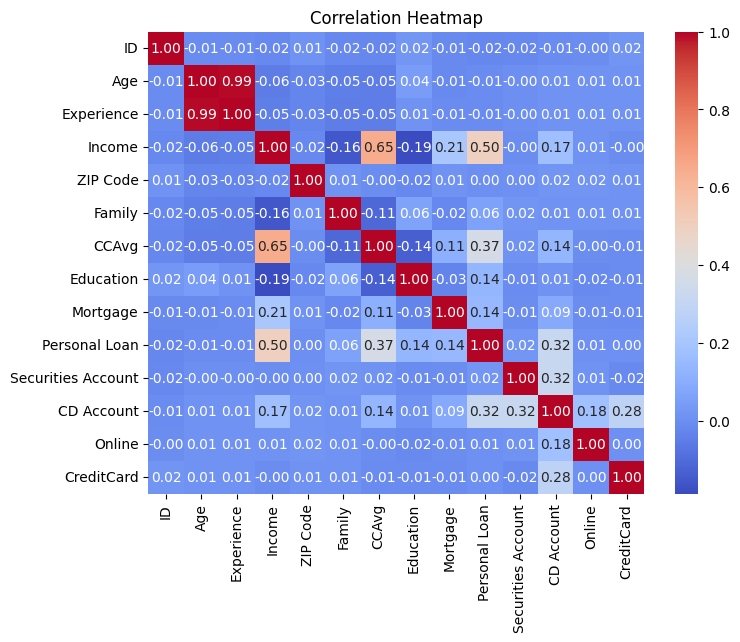

In [185]:

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [186]:

# Pairplot to visualize relationships
# sns.pairplot(df)
# plt.show()

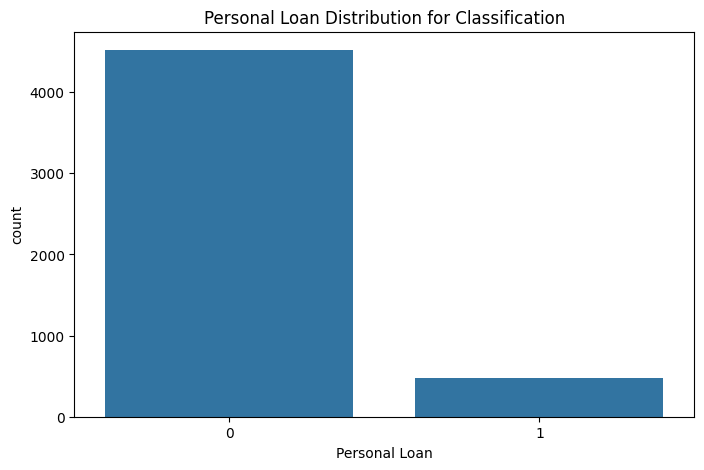

In [187]:

# Distribution of the target variable for classification
plt.figure(figsize=(8, 5))
sns.countplot(x='Personal Loan', data=df)
plt.title("Personal Loan Distribution for Classification")
plt.show()

In [188]:
# Count Personal Loan values 0
print((df['Personal Loan'] == 0).sum())

4520


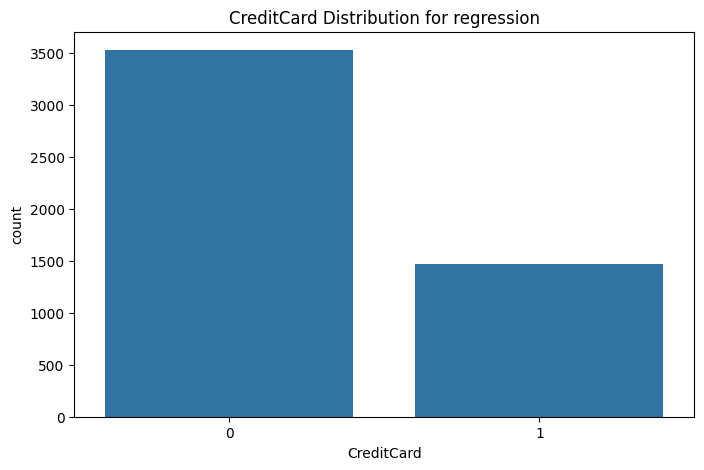

In [189]:
# Distribution of the target variable for regression
plt.figure(figsize=(8, 5))
sns.countplot(x='CreditCard', data=df)
plt.title("CreditCard Distribution for regression")
plt.show()

In [190]:
# Count CreditCard values 0
print((df['CreditCard'] == 0).sum())

3530


In [191]:
# Drop unnecessary columns (e.g., ID, ZIP Code)
df = df.drop(['ID', 'ZIP Code'], axis=1)

# Implement KNN

In [192]:
# Separate features and target variable
X = df.drop(['Personal Loan', 'CreditCard'], axis=1)
y_class = df['Personal Loan']  # For Classification
y_reg = df['CreditCard'] # For Regression

# Split the data into training and testing sets
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)


# Feature scaling for better performance with KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
# Model Training

# KNN for Classification
# Initialize the KNN classifier
knn_class = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_class.fit(X_train_scaled, y_class_train)


# KNN for Regression
# Initialize the KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
# Train the model
knn_reg.fit(X_train_scaled, y_reg_train)

KNeighborsRegressor()

In [194]:
# Model Evaluation: Classification

# Predict and evaluate classification performance
y_class_pred = knn_class.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("Confusion Matrix:\n", confusion_matrix(y_class_test, y_class_pred))
print("Classification Report:\n", classification_report(y_class_test, y_class_pred))

Accuracy: 0.956
Confusion Matrix:
 [[1336    7]
 [  59   98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.93      0.62      0.75       157

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.86      1500
weighted avg       0.96      0.96      0.95      1500



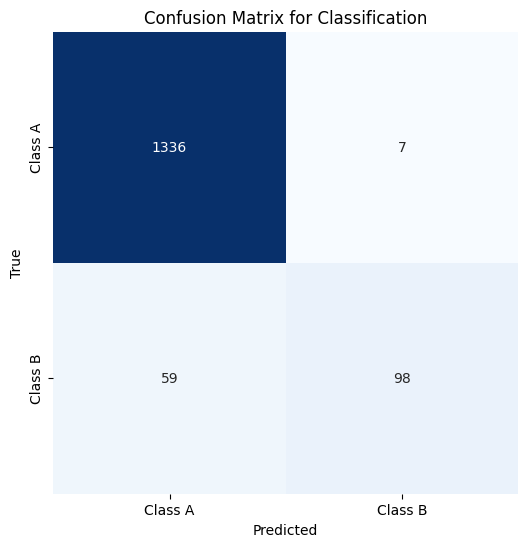

In [195]:
# Confusion Matrix for Classification (Optional)

conf_matrix = confusion_matrix(y_class_test, y_class_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class A', 'Class B'], yticklabels=['Class A', 'Class B'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Classification')
plt.show()

In [196]:
# Model Evaluation: Regression

# Predict and evaluate regression performance
y_reg_pred = knn_reg.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

# Print Regression Metrics
print("\nRegression Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2):", r2)


Regression Metrics:
Mean Squared Error (MSE): 0.2094666666666667
Root Mean Squared Error (RMSE): 0.457675285182264
R-squared (R^2): -0.028655240074120902


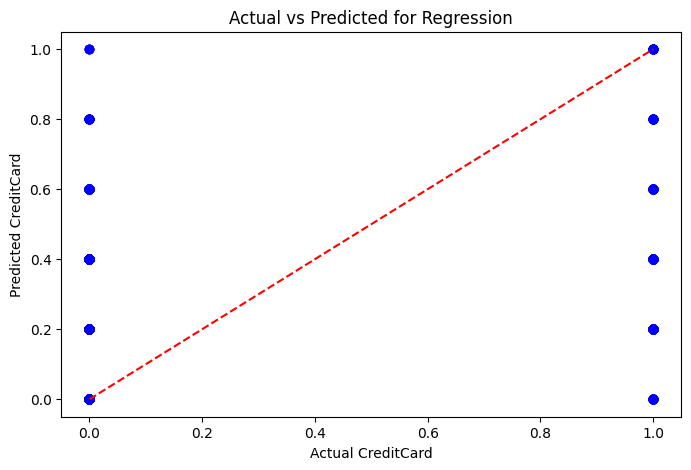

In [197]:
# Visualization: Actual vs Predicted for Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_reg_test, y_reg_pred, color='blue')
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], color='red', linestyle='--')
plt.xlabel('Actual CreditCard')
plt.ylabel('Predicted CreditCard')
plt.title('Actual vs Predicted for Regression')
plt.show()

In [198]:
# Tune Hyperparameters
# Experiment with different values of k
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_class_train)
    y_pred = knn.predict(X_test)
    print(f"K = {k}, Accuracy: {accuracy_score(y_class_test, y_pred)}")

K = 1, Accuracy: 0.8926666666666667
K = 2, Accuracy: 0.9053333333333333
K = 3, Accuracy: 0.906
K = 4, Accuracy: 0.9
K = 5, Accuracy: 0.902
K = 6, Accuracy: 0.904
K = 7, Accuracy: 0.9033333333333333
K = 8, Accuracy: 0.9013333333333333
K = 9, Accuracy: 0.9066666666666666
K = 10, Accuracy: 0.9046666666666666
K = 11, Accuracy: 0.9046666666666666
K = 12, Accuracy: 0.9066666666666666
K = 13, Accuracy: 0.9033333333333333
K = 14, Accuracy: 0.9046666666666666
